In [1]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%load_ext autoreload
%autoreload 2 
plt.rcParams["figure.figsize"] = (4.5,3.5)
plt.rc('legend', fontsize = 10)
plt.rcParams["legend.framealpha"] = 1

keynote_folder_path='/Users/nicolas/Library/Mobile Documents/com~apple~Keynote/Documents/YIF_annual_meeting/'

## Decay rate calibration


In [2]:
path = '../../data_mac/data_wq5304_28_06_2024_ZGEEV/'

dyns={}
paramchar= "nl2_n2_2_E0.10E-01_dtadd0.20_0.20_4_ar0.0_g0.250_gam0.051464_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw3.000_mr0.00_0.50_0.00_wd7.500_ad0.2236_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv0.0_tmax40_TRSM3"
dyns["2"] = da.dynamics(2,path, paramchar)
paramchar= "nl2_n2_10_E0.10E-01_dtadd0.20_0.20_4_ar0.0_g0.250_gam0.051464_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw3.000_mr0.00_0.50_0.00_wd7.500_ad0.2236_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv0.0_tmax40_TRSM3"
dyns["10 E0.10E-01"] = da.dynamics(2,path, paramchar)
paramchar= "nl2_n2_10_E0.20E-02_dtadd0.20_0.20_4_ar0.0_g0.250_gam0.051464_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw3.000_mr0.00_0.50_0.00_wd7.500_ad0.2236_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv0.0_tmax40_TRSM3"
dyns["10 E0.20E-02"] = da.dynamics(2,path, paramchar)

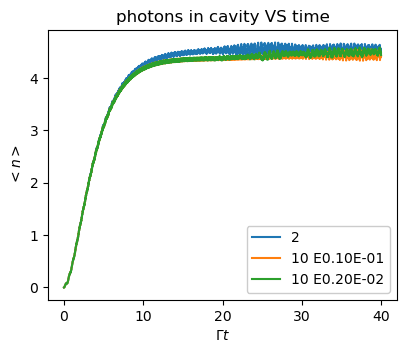

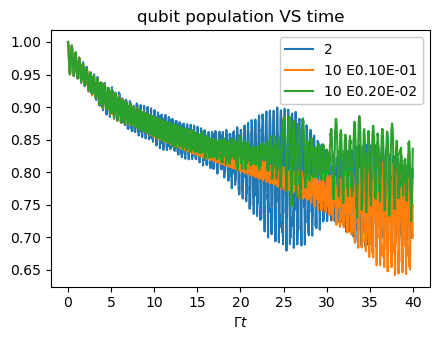

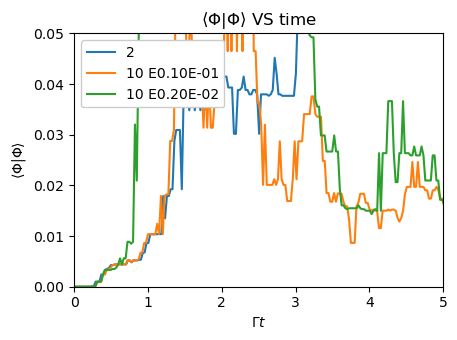

In [3]:
for key in dyns:
    plt.plot( dyns[key].times, dyns[key].nk[:,0], label=key  )
#plt.ylim(7,8)
#plt.xlim(225,250)
plt.ylabel( "$<n>$" )
plt.xlabel( "$\Gamma t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.show()

for key in dyns:
    plt.plot( dyns[key].times, dyns[key].pplt[:,1], label=key  )
plt.xlabel( "$\Gamma t$" )
plt.title( "qubit population VS time"  )
plt.legend()
plt.tight_layout()
plt.show()

for key in dyns:
    plt.plot( dyns[key].times, dyns[key].error, label=key  )
plt.ylabel( r"$\langle \Phi | \Phi \rangle$" )
plt.xlabel( "$\Gamma t$" )
plt.title( r"$\langle \Phi | \Phi \rangle$ VS time"  )
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig( keynote_folder_path+'error_convergence.pdf',format='pdf' )
plt.ylim(0,0.05)
plt.xlim(0,5)
plt.show()

In [4]:
e_val_1, e_vec_1 = np.linalg.eigh( dyns["10"].final_state.ovm[1,:,1,:] )
e_val_0, e_vec_0 = np.linalg.eigh( dyns["10"].final_state.ovm[0,:,0,:] )
e_val_0.sort()

plt.plot( np.abs(e_val_0), label='|0>', c='blue',linewidth=4,alpha=0.2  )
plt.plot( np.abs(e_val_1), label='|1>', c='red',linewidth=4,alpha=0.2  )
plt.plot( np.abs( np.sort(dyns['10'].ovm_evals_0[-1,:])), dashes=[2,2,2,2], c='blue', label='|0>' )
plt.plot( np.abs( np.sort(dyns['10'].ovm_evals_1[-1,:])), dashes=[2,2,2,2], c='red', label='|1>' )
plt.yscale('log')
plt.title('overlap matrix spectrum at final time')
plt.ylabel('eigenvalue')
plt.xlabel('index')
plt.legend()

KeyError: '10'

In [5]:
ordred_ind_0 = np.flip( np.argsort( np.abs(dyns["10"].final_state.p[0,:]) ) )
ordred_ind_1 = np.flip( np.argsort( np.abs(dyns["10"].final_state.p[1,:]) ) )
plt.plot( np.abs( dyns["10"].final_state.p[0,ordred_ind_0]), label='0.03 |0>', c='blue'  )
plt.plot( np.abs( dyns["10"].final_state.p[1,ordred_ind_1]), label='0.03 |1>', c='red'   )
plt.yscale('log')
plt.ylabel(r'$|p_n|$')
plt.xlabel('Coherent state index')
plt.title('Absolute weight of the coherent states')
plt.legend()

KeyError: '10'

In [6]:
for i in range(dyns['10'].ncs_max):
    plt.plot( dyns[key].times, np.abs(dyns['10'].ovm_evals_0[:,i]), label=i )
plt.yscale('log')
plt.legend()
plt.show()

for i in range(dyns['10'].ncs_max):
    plt.plot( dyns[key].times, np.abs(dyns['10'].ovm_evals_1[:,i]), label=i )
plt.yscale('log')
plt.legend()

KeyError: '10'

In [22]:
print(dyns["10"].log)

 ========== LOG FILE ============
 
 -- simulation parameter char:
 nl2_n2_10_E0.10E-01_dtadd0.20_0.20_4_ar0.0_g0.250_gam0.051464_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw3.000_mr0.00_0.50_0.00_wd7.500_ad0.2236_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv0.0_tmax40_TRSM3                                                                            
 
 -- parameters initialised
 -- arrays allocated
 -- trajectory allocated
 -- BARE state initialisation complete
  TIME  ||  DEL t   || err || sol || oth ||  su || ncs || SFE -- SFE                                 
 ------ || -------- || --- || --- || --- || --- || --- || ----------                                 
    0.0 ||        0 ||   0 ||   0 ||   0 ||   0 ||   2 ||  30 --   0                                 
 -- CS ADDED: fr  2 to   3 at t=   1.00              
 -- CS ADDED: fr  3 to   4 at t=   1.20              
 -- CS ADDED: fr  4 to   5 at t=   1.40              
 -- CS ADDED: fr  5 to   6 at t=   1.60          